In [246]:
# implement logestic regresstion from scratch  sklearn  using  fetch_california_housing  dataset for pedicting house price dataset
# normilize the dataset
# implement gradient descent to optimize bayes and byses
# train the mode for 100 epochs , ,learning rate  = 0.01
# evaluate ther model using mse and r2 score
# plot the  regression line 

In [247]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score





In [248]:
dataset = fetch_california_housing()['data']


In [249]:
dataset

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [250]:



dataset = fetch_california_housing()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

data['Target'] = dataset.target
print(data.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [251]:
data.shape

(20640, 9)

In [252]:
data['Target'] = (data.Target > data.Target.mean()).astype(int)


In [253]:

X = data.drop(columns=['Target','AveRooms','AveBedrms', 'Population' , 'AveOccup'  ,'Latitude' , 'Longitude'])
y = data['Target']
print(X)

       MedInc  HouseAge
0      8.3252      41.0
1      8.3014      21.0
2      7.2574      52.0
3      5.6431      52.0
4      3.8462      52.0
...       ...       ...
20635  1.5603      25.0
20636  2.5568      18.0
20637  1.7000      17.0
20638  1.8672      18.0
20639  2.3886      16.0

[20640 rows x 2 columns]


In [254]:
y

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: Target, Length: 20640, dtype: int32

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [256]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [257]:
# Cross-entropy loss function : Loss likelihood
def cross_entropy_loss(y, y_pred):
    # p = np.clip(p, 1e-15, 1 - 1e-15)  # Avoid log(0)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

In [258]:
# gradient of a loss
def compute_gradient(X,y,y_pred):
  n = y.shape[0]
  return np.dot(X.T,(y_pred - y))/n

In [259]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)

        for epoch in range(self.epochs):
           
            linear_model = np.dot(X, self.weights) + self.bias
            
            y_pred = self.sigmoid(linear_model)

          
            # Backward pass
            loss = cross_entropy_loss(y,y_pred)
            gradient = compute_gradient(X,y, y_pred) 
               
            #dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * db
        
            print(f'Iteration {epoch}: Weights={self.weights}, Loss={loss}')
            
    def predict(self, X):
        
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        
        return [1 if i > 0.5 else 0 for i in y_pred]        

In [260]:
    def plot_decision_boundary(self, X, y):
        # Create a grid of points
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict the class for each point in the grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z).reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary')
        plt.show()




In [261]:


model = LogisticRegressionGD(learning_rate=0.01, epochs=100)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

Iteration 0: Weights=[0.00266663 0.00038164], Loss=0.6931471805599453
Iteration 1: Weights=[0.0053267  0.00076314], Loss=0.6923374331486282
Iteration 2: Weights=[0.00798025 0.00114449], Loss=0.6915316058479202
Iteration 3: Weights=[0.01062727 0.0015257 ], Loss=0.6907296793294256
Iteration 4: Weights=[0.0132678  0.00190676], Loss=0.6899316342809502
Iteration 5: Weights=[0.01590184 0.00228767], Loss=0.689137451408209
Iteration 6: Weights=[0.01852941 0.00266843], Loss=0.6883471114365203
Iteration 7: Weights=[0.02115054 0.00304904], Loss=0.68756059511248
Iteration 8: Weights=[0.02376523 0.0034295 ], Loss=0.6867778832056239
Iteration 9: Weights=[0.02637351 0.0038098 ], Loss=0.6859989565100669
Iteration 10: Weights=[0.02897539 0.00418994], Loss=0.685223795846129
Iteration 11: Weights=[0.03157088 0.00456993], Loss=0.6844523820619386
Iteration 12: Weights=[0.03416002 0.00494975], Loss=0.683684696035019
Iteration 13: Weights=[0.03674281 0.00532942], Loss=0.6829207186738527
Iteration 14: Weights

Iteration 24: Weights=[0.06473978 0.00949474], Loss=0.6747563149875908
Iteration 25: Weights=[0.06724782 0.00987238], Loss=0.6740353657892708
Iteration 26: Weights=[0.06974976 0.01024984], Loss=0.6733178805569734
Iteration 27: Weights=[0.07224559 0.01062711], Loss=0.6726038407846024
Iteration 28: Weights=[0.07473536 0.01100421], Loss=0.671893228017783
Iteration 29: Weights=[0.07721907 0.01138113], Loss=0.6711860238550491
Iteration 30: Weights=[0.07969675 0.01175787], Loss=0.670482209949005
Iteration 31: Weights=[0.08216841 0.01213443], Loss=0.6697817680074603
Iteration 32: Weights=[0.08463407 0.0125108 ], Loss=0.6690846797945386
Iteration 33: Weights=[0.08709375 0.01288698], Loss=0.6683909271317611
Iteration 34: Weights=[0.08954747 0.01326298], Loss=0.6677004918991027
Iteration 35: Weights=[0.09199525 0.0136388 ], Loss=0.667013356036022
Iteration 36: Weights=[0.09443711 0.01401442], Loss=0.6663295015424653
Iteration 37: Weights=[0.09687306 0.01438986], Loss=0.665648910479844
Iteration 

In [262]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7778585271317829
Confusion Matrix:
[[2280  196]
 [ 721  931]]


In [263]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.22214147286821706
R2 Score: 0.074559842282522


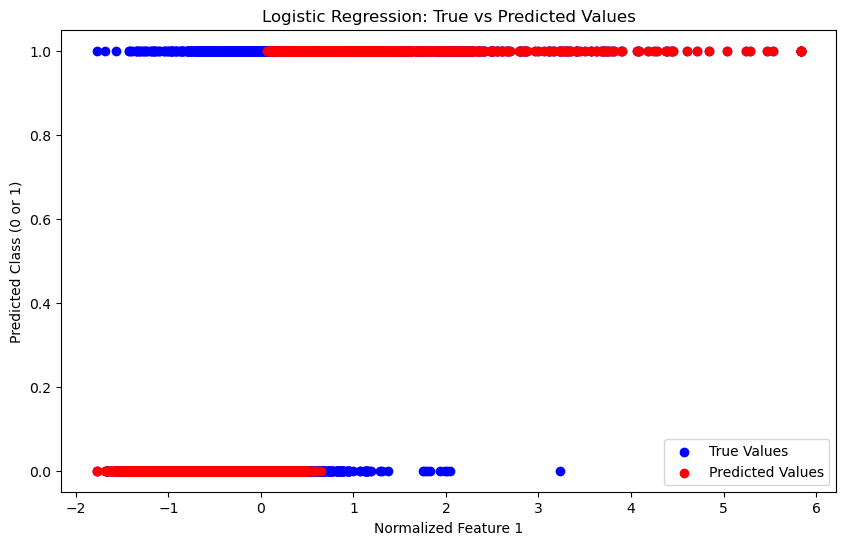

In [264]:


plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='True Values')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Values')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Predicted Class (0 or 1)')
plt.title('Logistic Regression: True vs Predicted Values')
plt.legend()
plt.show()
